# Calculation Code:

### Analysis of `To estimate the temperature of stars by photometry` experiment
Exp Date : 27th Mar, 23

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Reading Data File
df_new = pd.read_excel(r'/home/mandal-anik/Desktop/Sem-4/Astrolab/Star.xlsx')
df_new

,Unnamed: 0,Star,Time(IST),B_flux,B_error,V_flux,V_error,B_background,V_background,B_net,V_net
0,0,Regulus,22:25:00,273,3,298,4,7,4,266,294
1,1,Denebola,22:43:00,110,2,144,3,4,3,106,141
2,2,Algaiba,22:45:00,54,1,156,2,1,2,53,154
3,3,Zosma,22:51:00,74,1,98,2,2,2,72,96
4,4,Dubhe,23:03:00,58,1,167,2,1,2,57,165
5,5,Phad,23:50:00,76,2,95,3,1,2,75,93
6,6,Arcturus,01:03:00,273,3,920,15,2,4,271,916
7,7,spica,02:19:00,120,3,134,3,2,2,118,132
8,8,Muphrid,02:28:00,13,0,25,0,1,2,12,23
9,9,Alkaid,02:32:00,38,1,47,1,1,2,37,45



$$
B-V = -2.5 log(\frac{B_{net}}{V_{net}})
$$

In [ ]:
def Color_Index(data):
    ci = np.array(-2.5 * np.log10((data["B_net"])/(data["V_net"])))
    ci_high = np.array(-2.5 * np.log10((data["B_net"]-data["B_error"])/(data["V_net"]+data["V_error"])))
    ci_low = np.array(-2.5 * np.log10((data["B_net"]+data["B_error"])/(data["V_net"]-data["V_error"])))
    return [ci, ci_high, ci_low]

In [ ]:
ci, ci_high, ci_low = Color_Index(df_new)
ci_highError = ci_high - ci
ci_lowError = ci_low - ci

In [ ]:
for i in range(len(df_new['Star'])):
    ist = "IST {}".format(df_new['Time(IST)'][i])
    a = "Color index of {:}\t\t".format(df_new['Star'][i])
    err = [float('{:.4f}'.format(ci_lowError[i])), float('{:.4f}'.format(ci_highError[i]))]
    print(ist, a, '{:.2f}'.format(ci[i]), err)

IST 22:25:00 Color index of Regulus		 0.11 [-0.027, 0.027]
IST 22:43:00 Color index of Denebola		 0.31 [-0.0436, 0.0435]
IST 22:45:00 Color index of Algaiba 		 1.16 [-0.0345, 0.0347]
IST 22:51:00 Color index of Zosma		 0.31 [-0.0378, 0.0376]
IST 23:03:00 Color index of Dubhe		 1.15 [-0.0321, 0.0323]
IST 23:50:00 Color index of Phad		 0.23 [-0.0642, 0.0638]
IST 01:03:00 Color index of Arcturus		 1.32 [-0.0299, 0.0297]
IST 02:19:00 Color index of spica		 0.12 [-0.0522, 0.0524]
IST 02:28:00 Color index of Muphrid		 0.71 [0.0, 0.0]
IST 02:32:00 Color index of Alkaid		 0.21 [-0.0534, 0.0536]


Color Index-Temperature relation mantioned in the slides,

$$
T \approx 7000(\frac{1}{(B-V) + 0.56})\ K
$$

In [ ]:
def ColIdx_to_temp(col_idx):
    # t = 4600*(1/(0.92*col_idx + 1.7) + 1/(0.92*col_idx + 0.62))    # Another relation that we can use
    t = 7000 * (1/(col_idx + 0.56))
    return t

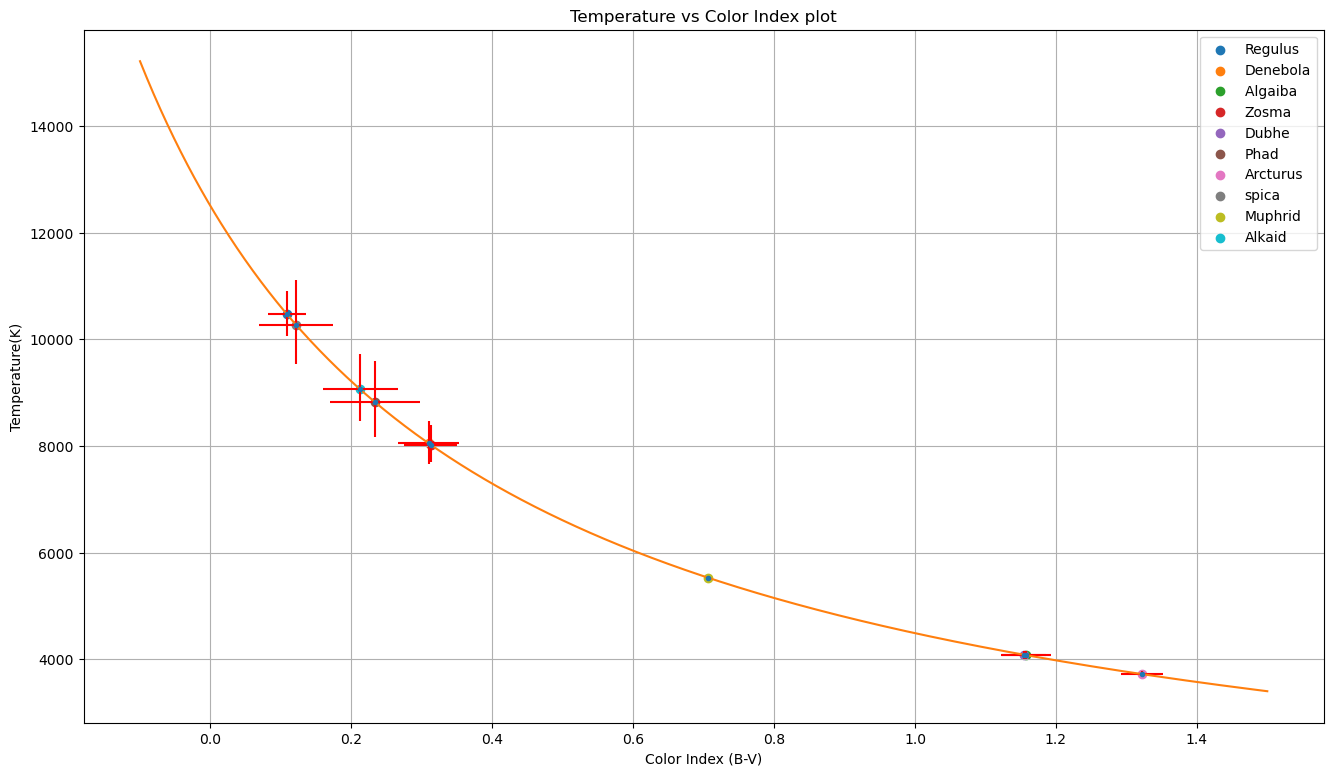

In [10]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111)

ci_i = np.linspace(-0.10, 1.5, 1000)
T_i = ColIdx_to_temp(ci_i)
    

T = ColIdx_to_temp(ci)
T_low = T - ColIdx_to_temp(ci + ci_highError)
T_high = ColIdx_to_temp(ci + ci_lowError) - T
ci_err = [-ci_lowError, ci_highError]
T_err = [T_low, T_high]
ax.errorbar(x=ci, y=T, xerr=ci_err, yerr= T_err, fmt='.', ecolor = 'red')


for i in range(len(ci)):
    Ti = ColIdx_to_temp(ci[i])
    ax.scatter(ci[i], Ti, label= str(df_new['Star'][i]))
               

ax.plot(ci_i, T_i)
ax.set_title("Temperature vs Color Index plot")
ax.set_ylabel("Temperature(K)")
ax.set_xlabel("Color Index (B-V)")
ax.grid()
ax.legend()

plt.savefig(r"/home/mandal-anik/Desktop/Sem-4/Astrolab/Star_Temp/ColIdvsTemp.png")
plt.show()

In [11]:
# print("Starting Date of Experiment:", Date, '\n')
for i in range(len(T)):
    ist = "IST {}".format(df_new['Time(IST)'][i])
    a = "Surface Tempurature of {:}\t\t".format(df_new['Star'][i])
    err = [float('{:.2f}'.format(-T_low[i])), float('{:.2f}'.format(T_high[i]))]
    print(ist, a, '{:.2f}'.format(T[i]), err, 'K')

IST 22:25:00 Surface Tempurature of Regulus		 10468.63 [-406.12, 441.35] K
IST 22:43:00 Surface Tempurature of Denebola		 8047.98 [-383.66, 425.17] K
IST 22:45:00 Surface Tempurature of Algaiba 		 4074.24 [-80.64, 83.46] K
IST 22:51:00 Surface Tempurature of Zosma		 8024.33 [-331.34, 363.8] K
IST 23:03:00 Surface Tempurature of Dubhe		 4083.96 [-75.53, 78.0] K
IST 23:50:00 Surface Tempurature of Phad		 8821.07 [-656.58, 776.13] K
IST 01:03:00 Surface Tempurature of Arcturus		 3718.82 [-57.81, 59.98] K
IST 02:19:00 Surface Tempurature of spica		 10268.00 [-732.38, 851.75] K
IST 02:28:00 Surface Tempurature of Muphrid		 5527.63 [-0.0, 0.0] K
IST 02:32:00 Surface Tempurature of Alkaid		 9061.17 [-588.01, 672.23] K


### Error Calculation

In [12]:
# Exact median values taken from Google
T_exact = [11668, 8500, 4470, 8296, 4500, 9355, 4290, 22400, 6100, 15540]

rel_err = abs(T- T_exact)*100/ T_exact 
rel_err

array([10.27911985,  5.31784369,  8.85370634,  3.27469593,  9.24533636,
        5.70739228, 13.3141246 , 54.16072533,  9.38318359, 41.69129811])